In [43]:
import statsmodels.api as sm
import statsmodels.stats.api as sms
import scipy as sp
import seaborn as sns
import statsmodels.api as sm
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
df = pd.read_csv("modify1.csv")

In [45]:
df.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup,dist,speed,month,dayofweek,hour,count
1310317,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.98,40.75,-73.99,40.74,0,778,"(40.745521545410156, -73.9822006225586)",1.22,5.67,4,4,13,1
1310318,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.00,40.75,-73.97,40.80,0,655,"(40.74737930297852, -74.00094604492188)",6.05,33.23,1,6,7,1
1310319,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.96,40.77,-74.00,40.71,0,764,"(40.768798828125, -73.9591293334961)",7.82,36.85,4,4,6,1
1310320,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.98,40.75,-73.97,40.76,0,373,"(40.749061584472656, -73.9820785522461)",1.09,10.54,1,1,15,1
1310321,id1209952,1,2016-04-05 14:44:25,2016-04-05 14:47:43,1,-73.98,40.78,-73.97,40.79,0,198,"(40.7817497253418, -73.9795379638672)",1.13,20.61,4,1,14,1


In [46]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dist,speed,month,dayofweek,hour,count
count,1310322.00,1310322.00,1310322.00,1310322.00,1310322.00,1310322.00,1310322.00,1310322.00,1310322.00,1310322.00,1310322.00,1310322.00,1310322.00,1310322.00
mean,1.53,1.67,-73.97,40.75,-73.97,40.75,0.01,868.92,3.74,15.13,3.51,3.06,13.63,1.00
std,0.50,1.31,0.04,0.03,0.04,0.03,0.07,654.28,4.03,7.52,1.68,1.96,6.47,0.00
min,1.00,1.00,-74.73,40.10,-74.78,40.15,0.00,61.00,0.70,5.00,1.00,0.00,0.00,1.00
25%,1.00,1.00,-73.99,40.74,-73.99,40.74,0.00,433.00,1.43,9.84,2.00,1.00,9.00,1.00
50%,2.00,1.00,-73.98,40.75,-73.98,40.75,0.00,689.00,2.32,13.38,4.00,3.00,14.00,1.00
75%,2.00,2.00,-73.97,40.77,-73.96,40.77,0.00,1097.00,4.21,18.40,5.00,5.00,19.00,1.00
max,2.00,6.00,-73.24,41.32,-72.72,41.48,1.00,10704.00,97.52,146.19,6.00,6.00,23.00,1.00


In [47]:
dfX0 = pd.DataFrame(df, columns=['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag', 'dist', 'speed', 'month', 'dayofweek', 'hour'])
dfX = sm.add_constant(dfX0) #(bias augmentaion 넣어주기)
dfy = pd.DataFrame(df, columns=["trip_duration"])

In [48]:
dfX.head()

,const,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,dist,speed,month,dayofweek,hour
0,1.00,2,1,-73.98,40.77,-73.96,40.77,0,1.50,11.85,3,0,17
1,1.00,1,1,-73.98,40.74,-74.00,40.73,0,1.80,9.80,6,6,0
2,1.00,2,1,-73.98,40.76,-74.01,40.71,0,6.38,10.82,1,1,11
3,1.00,2,1,-74.01,40.72,-74.01,40.71,0,1.48,12.46,4,2,19
4,1.00,2,1,-73.97,40.79,-73.97,40.78,0,1.19,9.83,3,5,13


In [49]:
dfX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310322 entries, 0 to 1310321
Data columns (total 13 columns):
const                 1310322 non-null float64
vendor_id             1310322 non-null int64
passenger_count       1310322 non-null int64
pickup_longitude      1310322 non-null float64
pickup_latitude       1310322 non-null float64
dropoff_longitude     1310322 non-null float64
dropoff_latitude      1310322 non-null float64
store_and_fwd_flag    1310322 non-null int64
dist                  1310322 non-null float64
speed                 1310322 non-null float64
month                 1310322 non-null int64
dayofweek             1310322 non-null int64
hour                  1310322 non-null int64
dtypes: float64(7), int64(6)
memory usage: 130.0 MB


## 1. 결정론적 회귀모형

### 01. Scikit-learn

In [26]:
from sklearn.linear_model import LinearRegression
model_taxi = LinearRegression().fit(dfX, dfy)

/usr/local/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


In [28]:
model_taxi.coef_

array([[ 0.00000000e+00, -1.53846465e-01,  2.31641811e-01,
        -5.32661703e+02,  1.21844693e+03, -2.25062015e+02,
        -2.66547634e+02,  1.95656742e+01,  1.83322289e+02,
        -4.74993378e+01,  8.64282210e+00, -1.51673853e+00,
        -1.09506350e+00]])

In [29]:
model_taxi.intercept_

array([-93950.12709836])

In [31]:
predictions = model_taxi.predict(dfX)

# plt.scatter(dfy, predictions) - 안돌아감..
plt.show()

### 02. StatsModels

In [32]:
model_taxi = sm.OLS(dfy, dfX) # OLS 클래스 객체 생성
result_taxi = model_taxi.fit() # fit 메서드 모형 추정
print(result_taxi.summary()) # summary

                            OLS Regression Results                            
Dep. Variable:          trip_duration   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                 5.490e+05
Date:                Mon, 05 Mar 2018   Prob (F-statistic):               0.00
Time:                        21:32:52   Log-Likelihood:            -9.1779e+06
No. Observations:             1310322   AIC:                         1.836e+07
Df Residuals:                 1310309   BIC:                         1.836e+07
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -9.395e+04    924

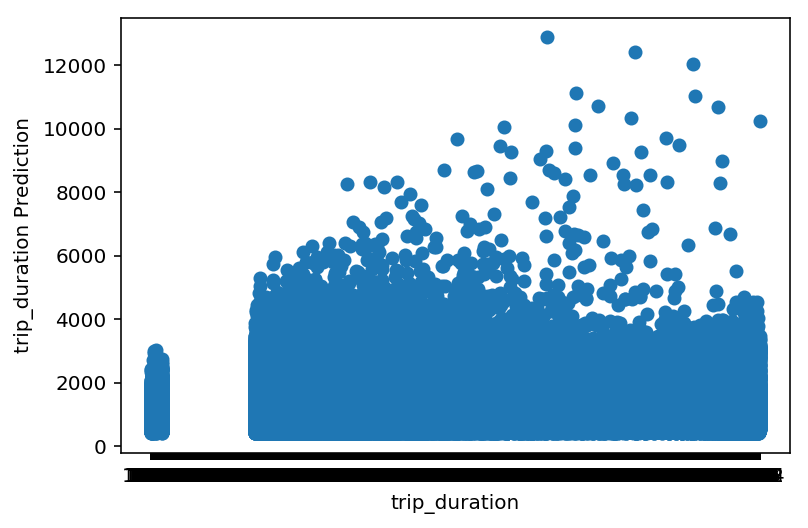

In [29]:
dfy_new = result_taxi.predict(dfX)
plt.scatter(dfy, dfy_new)

plt.xlabel("trip_duration")
plt.ylabel("trip_duration Prediction")

plt.show()

In [33]:
result_taxi.params # 모수 벡터

const                -93950.13
vendor_id                -0.15
passenger_count           0.23
pickup_longitude       -532.66
pickup_latitude        1218.45
dropoff_longitude      -225.06
dropoff_latitude       -266.55
store_and_fwd_flag       19.57
dist                    183.32
speed                   -47.50
month                     8.64
dayofweek                -1.52
hour                     -1.10
dtype: float64

In [37]:
result_taxi.resid.head(10) # 각 데이터별 잔차 (총 130만개)

0   -175.51
1   -137.11
2    543.95
3   -156.45
4   -254.71
5   -203.58
6   -150.35
7    172.85
8    -17.26
9    125.28
dtype: float64

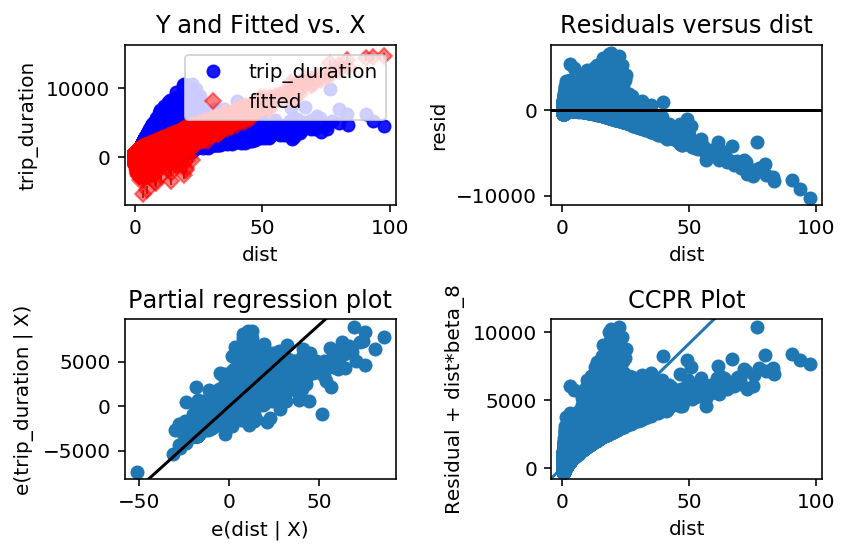

In [39]:
fig = sm.graphics.plot_regress_exog(result_taxi, "dist")
fig.suptitle("")
plt.show()

OLS(Ordinary Least Square) 방법을 사용하면 데이터에 대한 확률론적인 가정없이도 최적의 가중치를 계산할 수 있다. 그러나 이 경우에는 계산한 가중치가 어느 정도의 신뢰도 또는 안정성을 가지는지 확인할 수 있는 방법이 없다. 

이를 보완한것이 부트스트래핑

## 2. 확률론적 회귀모형

### 01. 잔차의 정규성 검정

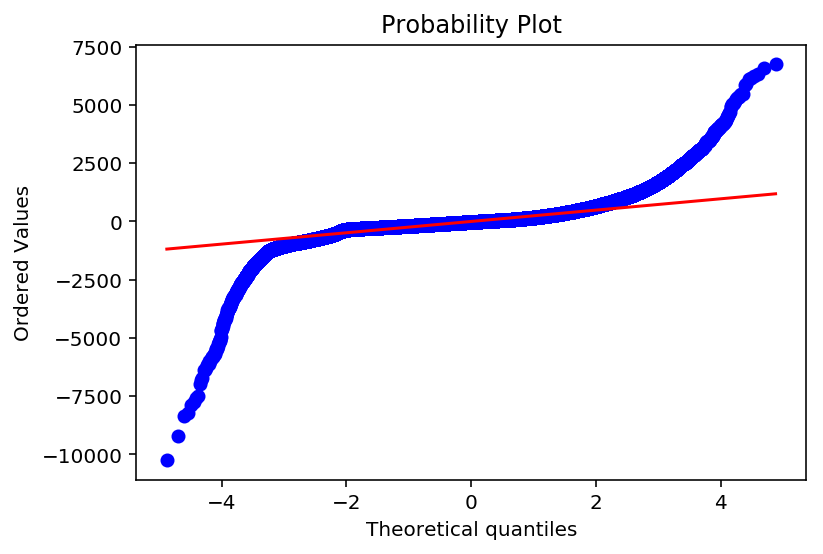

In [46]:
sp.stats.probplot(result_taxi.resid, plot=plt)
plt.show()

In [40]:
test = sms.omni_normtest(result_taxi.resid)
for xi in zip(['Chi^2', 'P-value'], test):
    print("%-12s: %6.3f" % xi)

Chi^2       : 574910.340
P-value     :  0.000


In [42]:
test = sms.jarque_bera(result_taxi.resid)
for xi in zip(['Jarque-Bera', 'P-value', 'Skew', 'Kurtosis'], test):
    print("%-12s: %6.3f" % xi)

Jarque-Bera : 53974650.772
P-value     :  0.000
Skew        :  1.188
Kurtosis    : 34.352


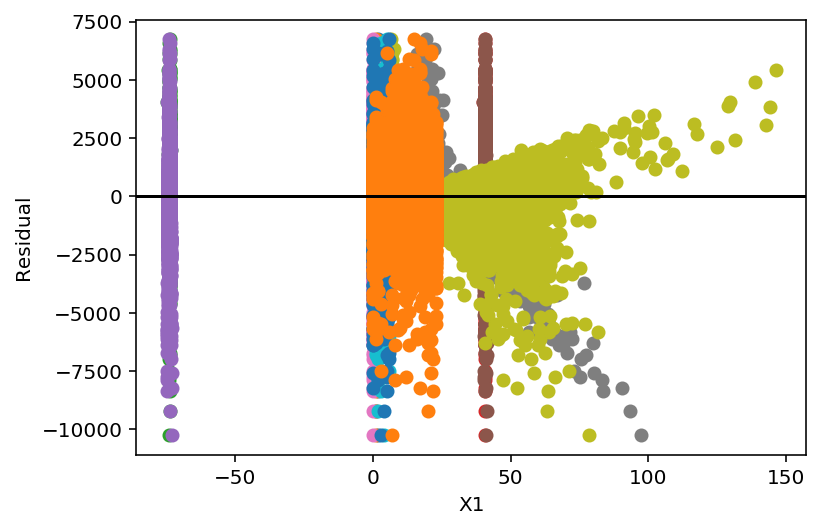

In [45]:
plt.plot(dfX0, result_taxi.resid, 'o')
plt.axhline(y=0, c='k')
plt.xlabel("X1")
plt.ylabel("Residual")
plt.show()

In [48]:
print(result_taxi.summary())

                            OLS Regression Results                            
Dep. Variable:          trip_duration   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                 5.490e+05
Date:                Mon, 05 Mar 2018   Prob (F-statistic):               0.00
Time:                        22:25:58   Log-Likelihood:            -9.1779e+06
No. Observations:             1310322   AIC:                         1.836e+07
Df Residuals:                 1310309   BIC:                         1.836e+07
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -9.395e+04    924

## 3. 레버리지

KeyboardInterrupt: 

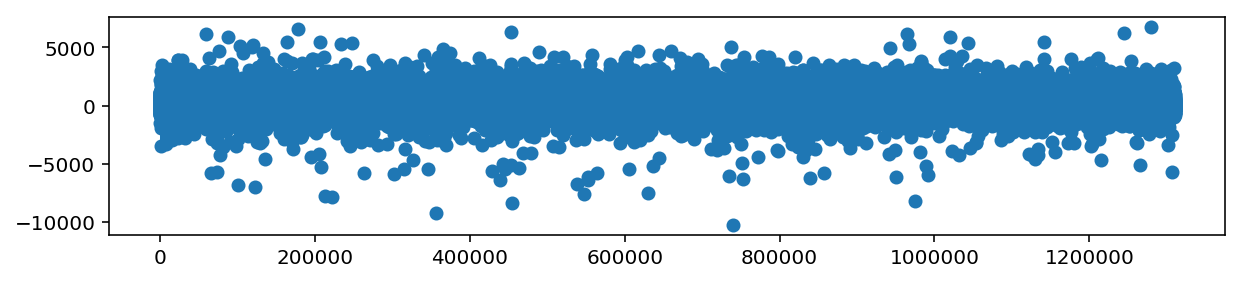

In [49]:
plt.figure(figsize=(10, 2))
plt.stem(result_taxi.resid)
plt.show()

In [ ]:
plt.figure(figsize=(10, 2))
plt.stem(result.resid_pearson)
plt.show()

### Category

#### 1) 월별로 확인

In [50]:
df_M = dfX["month"]

In [51]:
df_MM = pd.concat([df_M, dfy], axis = 1)

In [52]:
df_MM

,month,trip_duration
0,3,455
1,6,663
2,1,2124
3,4,429
4,3,435
5,1,443
6,6,341
7,5,1551
8,5,255
9,3,1225


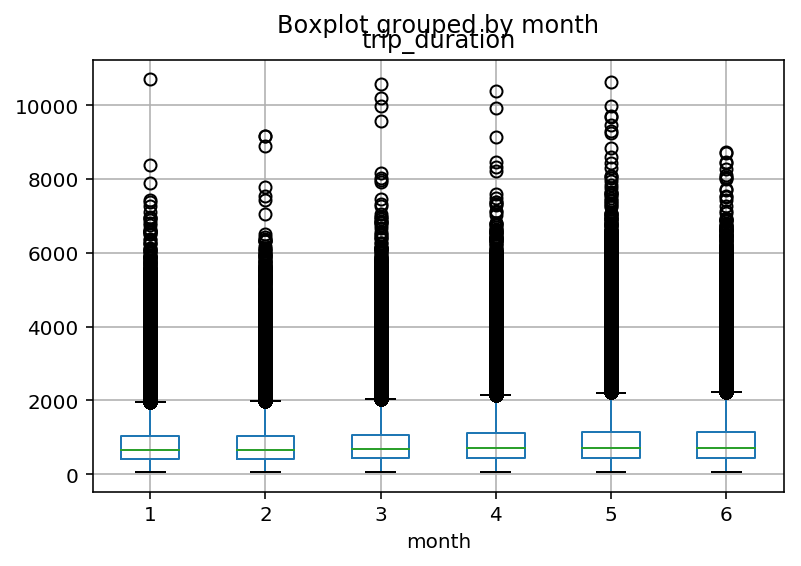

In [53]:
# boxplot으로 월별 trip_duration 확인
df_MM.boxplot("trip_duration", "month")
plt.show()

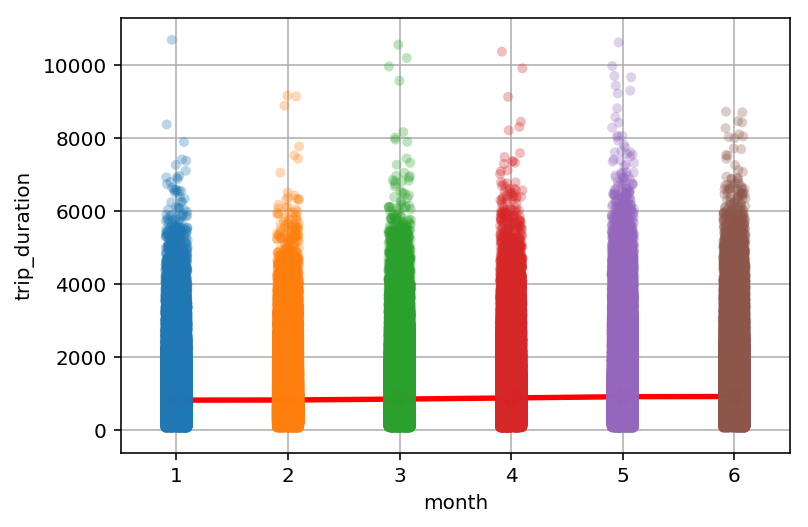

In [54]:
# stripplot으로 월별 trip_duration도 확인
sns.stripplot(x="month", y="trip_duration", data=df, jitter=True, alpha=.3)
sns.pointplot(x="month", y="trip_duration", data=df, dodge=True, color='r')

plt.grid(True)
plt.show()

In [55]:
model = sm.OLS.from_formula("trip_duration ~ C(month) + 0", df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:          trip_duration   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     950.0
Date:                Tue, 06 Mar 2018   Prob (F-statistic):               0.00
Time:                        09:56:36   Log-Likelihood:            -1.0352e+07
No. Observations:             1310322   AIC:                         2.070e+07
Df Residuals:                 1310316   BIC:                         2.070e+07
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
C(month)[1]   821.8824      1.435    572.660      

#### 2) 시간별로 확인

In [56]:
df_H = dfX["hour"]

In [57]:
df_HH = pd.concat([df_H, dfy], axis = 1)

In [58]:
df_HH.head()

,hour,trip_duration
0,17,455
1,0,663
2,11,2124
3,19,429
4,13,435


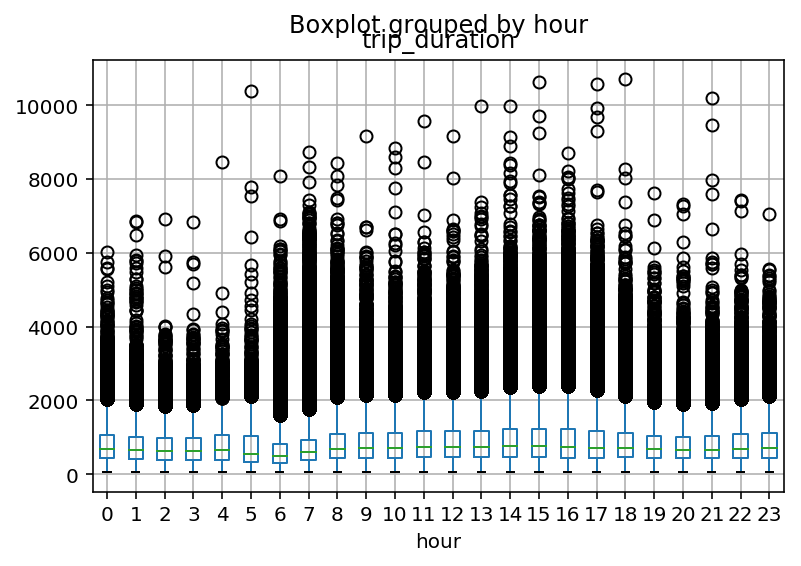

In [59]:
# boxplot으로 월별 trip_duration 확인
df_HH.boxplot("trip_duration", "hour")
plt.show()

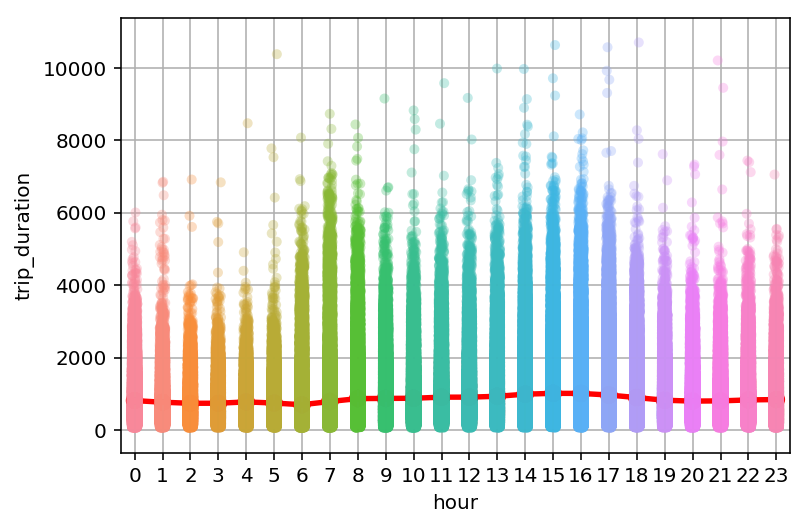

In [60]:
# stripplot으로 월별 trip_duration도 확인
sns.stripplot(x="hour", y="trip_duration", data=df, jitter=True, alpha=.3)
sns.pointplot(x="hour", y="trip_duration", data=df, dodge=True, color='r')

plt.grid(True)
plt.show()

In [61]:
model = sm.OLS.from_formula("trip_duration ~ C(hour) + 0", df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:          trip_duration   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     869.9
Date:                Tue, 06 Mar 2018   Prob (F-statistic):               0.00
Time:                        09:57:35   Log-Likelihood:            -1.0345e+07
No. Observations:             1310322   AIC:                         2.069e+07
Df Residuals:                 1310298   BIC:                         2.069e+07
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
C(hour)[0]    813.2423      2.924    278.122      

#### 4. 요일별로 확인

In [62]:
df_D = dfX["dayofweek"]

In [63]:
df_DD = pd.concat([df_D, dfy], axis = 1)

In [64]:
df_DD.head()

,dayofweek,trip_duration
0,0,455
1,6,663
2,1,2124
3,2,429
4,5,435


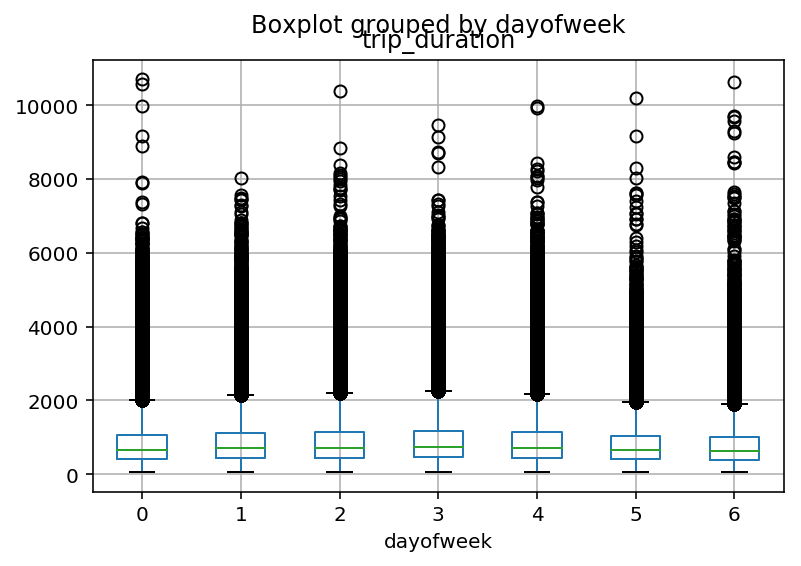

In [65]:
# boxplot으로 월별 trip_duration 확인
df_DD.boxplot("trip_duration", "dayofweek")
plt.show()

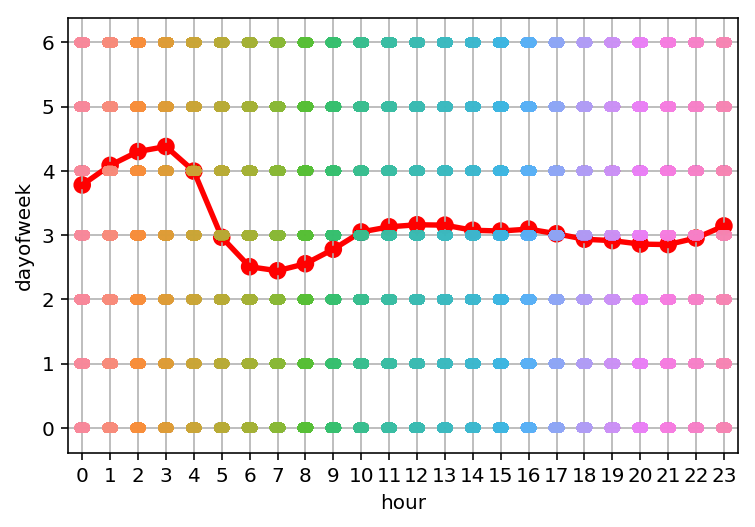

In [66]:
# stripplot으로 월별 trip_duration도 확인
sns.stripplot(x="hour", y="dayofweek", data=df, jitter=True, alpha=.3)
sns.pointplot(x="hour", y="dayofweek", data=df, dodge=True, color='r')

plt.grid(True)
plt.show()

In [67]:
model = sm.OLS.from_formula("trip_duration ~ C(dayofweek) + 0", df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:          trip_duration   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1268.
Date:                Tue, 06 Mar 2018   Prob (F-statistic):               0.00
Time:                        09:58:27   Log-Likelihood:            -1.0351e+07
No. Observations:             1310322   AIC:                         2.070e+07
Df Residuals:                 1310315   BIC:                         2.070e+07
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
C(dayofweek)[0]   844.7596      1.585    5

회귀 분석 대상이 되는 독립 변수가 카테고리 값을 가지는 변수인 경우에는 카테고리 값에 의해 연속 변수인 y값이 달라진다. 이러한 경우, 분산 분석(ANOVA)을 사용하면 카테고리 값의 영향을 정량적으로 분석할 수 있다. 또한 이는 카테고리 값에 의해 회귀 모형이 달라지는 것으로도 볼 수 있기 때문에 모형 비교에도 사용될 수 있다.